# Feature Effect Evaluation

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>

<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

In [1]:
config_file = "../config_sim_friedman1_centered.ini"
data_str = "20240612"  # e.g. "20240413"

# set up of example
sim_no = 1
n_train = 1000
snr = 10.0

In [2]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generating.data_generation import generate_data

In [3]:
config = ConfigParser()
config.read(config_file)

['../config_sim_friedman1_centered.ini']

## PDP

### Error of Model-PD compared to groundtruth-PD

In [4]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df

index                                    model_id                  model  \
0        0  RandomForestRegressor_20240612_1_1000_10.0  RandomForestRegressor   
1        0           XGBRegressor_20240612_1_1000_10.0           XGBRegressor   
2        0                    SVR_20240612_1_1000_10.0                    SVR   
3        0             ElasticNet_20240612_1_1000_10.0             ElasticNet   
4        0                    GAM_20240612_1_1000_10.0                    GAM   
..     ...                                         ...                    ...   
245      0  RandomForestRegressor_20240612_25_1000_5.0  RandomForestRegressor   
246      0           XGBRegressor_20240612_25_1000_5.0           XGBRegressor   
247      0                    SVR_20240612_25_1000_5.0                    SVR   
248      0             ElasticNet_20240612_25_1000_5.0             ElasticNet   
249      0                    GAM_20240612_25_1000_5.0                    GAM   

     simulation  n_train   snr              metric       x_1       x_2  \
0             1     1000  10.0  mean_squared_error  0.128911  0.087549   
1             1     1000  10.0  mean_squared_error  0.021785  0.018089   
2             1     1000  10.0  mean_squared_error  0.000441  0.002251   
3             1     1000  10.0  mean_squared_error  1.050580  0.965560   
4             1     1000  10.0  mean_squared_error  0.000484  0.000978   
..          ...      ...   ...                 ...       ...       ...   
245          25     1000   5.0  mean_squared_error  0.133607  0.095141   
246          25     1000   5.0  mean_squared_error  0.032685  0.019331   
247          25     1000   5.0  mean_squared_error  0.003222  0.002244   
248          25     1000   5.0  mean_squared_error  0.998932  0.919561   
249          25     1000   5.0  mean_squared_error  0.002275  0.003350   

          x_3       x_4       x_5  
0    0.702939  0.166610  0.104598  
1    0.036406  0.024300  0.011865  
2    0.001285  0.000350  0.001112  
3    2.315831  0.000345  0.006715  
4    0.003826  0.000013  0.000338  
..        ...       ...       ...  
245  0.733937  0.070914  0.095154  
246  0.033276  0.032159  0.017885  
247  0.009964  0.006001  0.002372  
248  2.322380  0.003354  0.042755  
249  0.022517  0.001331  0.002240  

[250 rows x 12 columns]

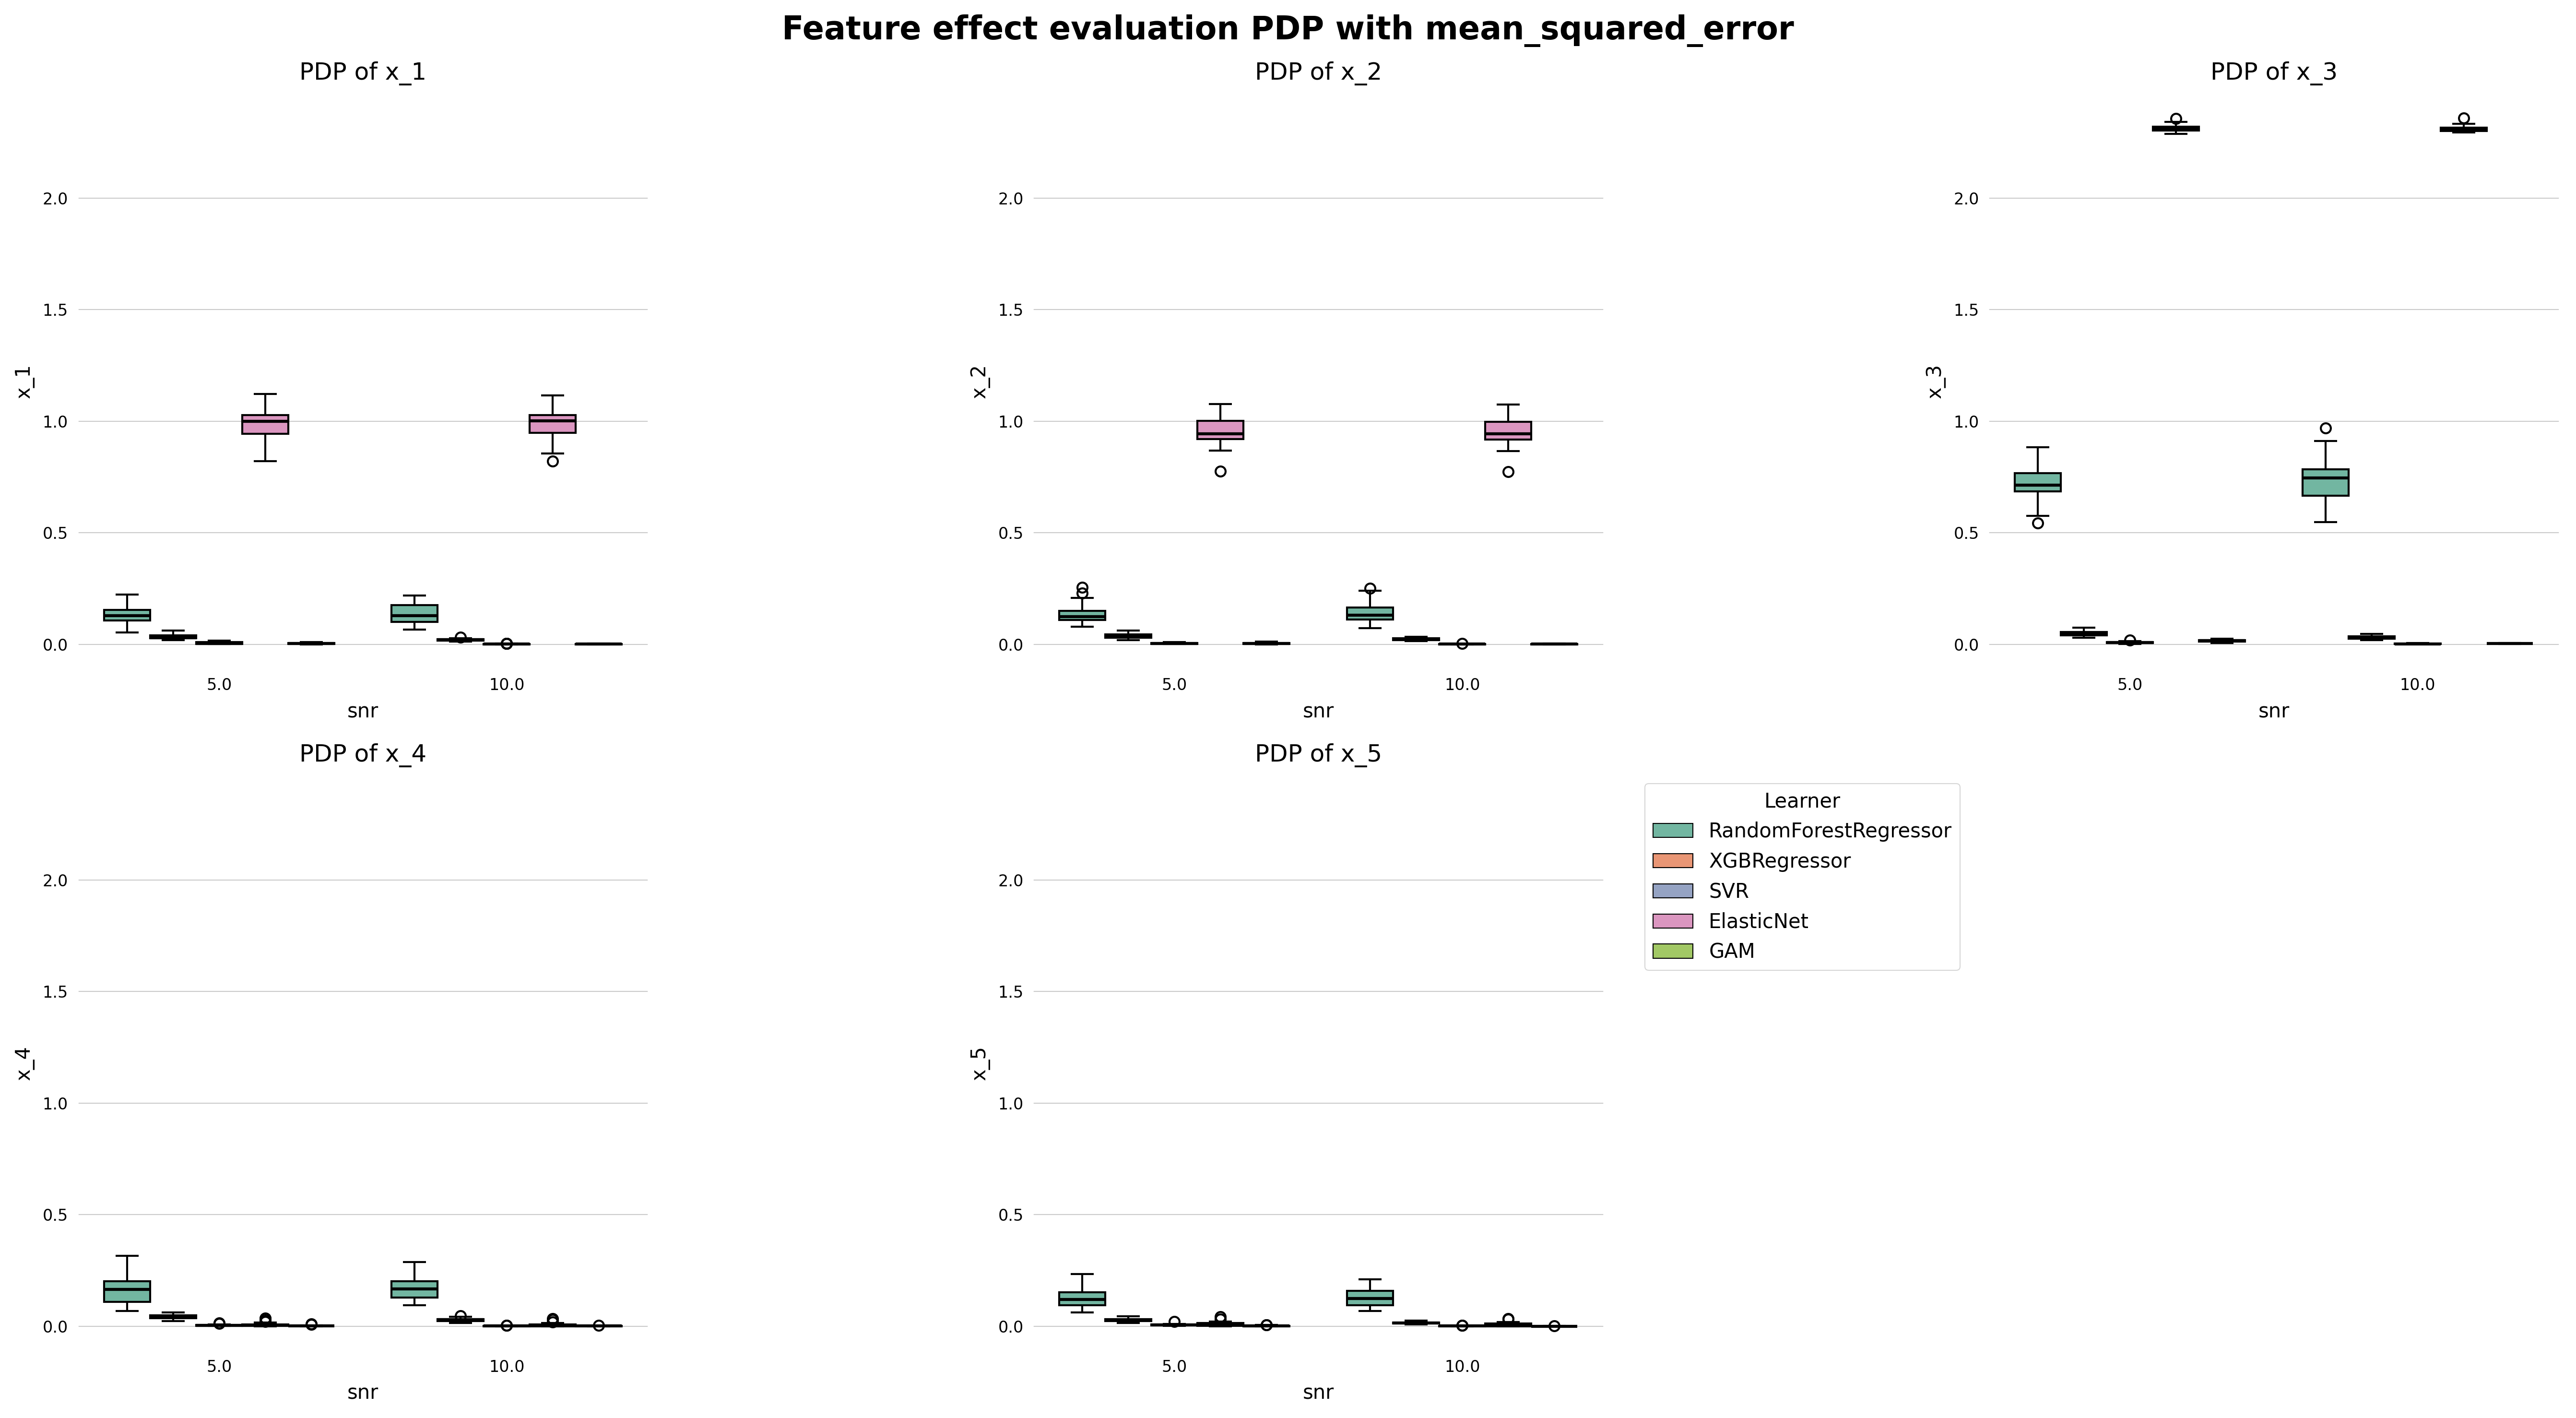

In [5]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="PDP");

### PDP example visualizations

In [6]:
md(f"(simulation no. {sim_no} with n_train={n_train} and snr={snr})")

(simulation no. 1 with n_train=1000 and snr=10.0)

In [8]:
# init groundtruth
from feature_effect_empirical_analysis.data_generating.friedman1 import Friedman1Groundtruth

groundtruth = load("../groundtruth.joblib")
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(groundtruth, 1000, 1000, snr, seed=1)
# load models
rf = load(f'../models/RandomForestRegressor_{data_str}_{sim_no}_{n_train}_{snr}.joblib')
xgb = load(f'../models/XGBRegressor_{data_str}_{sim_no}_{n_train}_{snr}.joblib')
svm = load(f'../models/SVR_{data_str}_{sim_no}_{n_train}_{snr}.joblib')
elasticnet = load(f'../models/ElasticNet_{data_str}_{sim_no}_{n_train}_{snr}.joblib')
gam = load(f'../models/GAM_{data_str}_{sim_no}_{n_train}_{snr}.joblib')

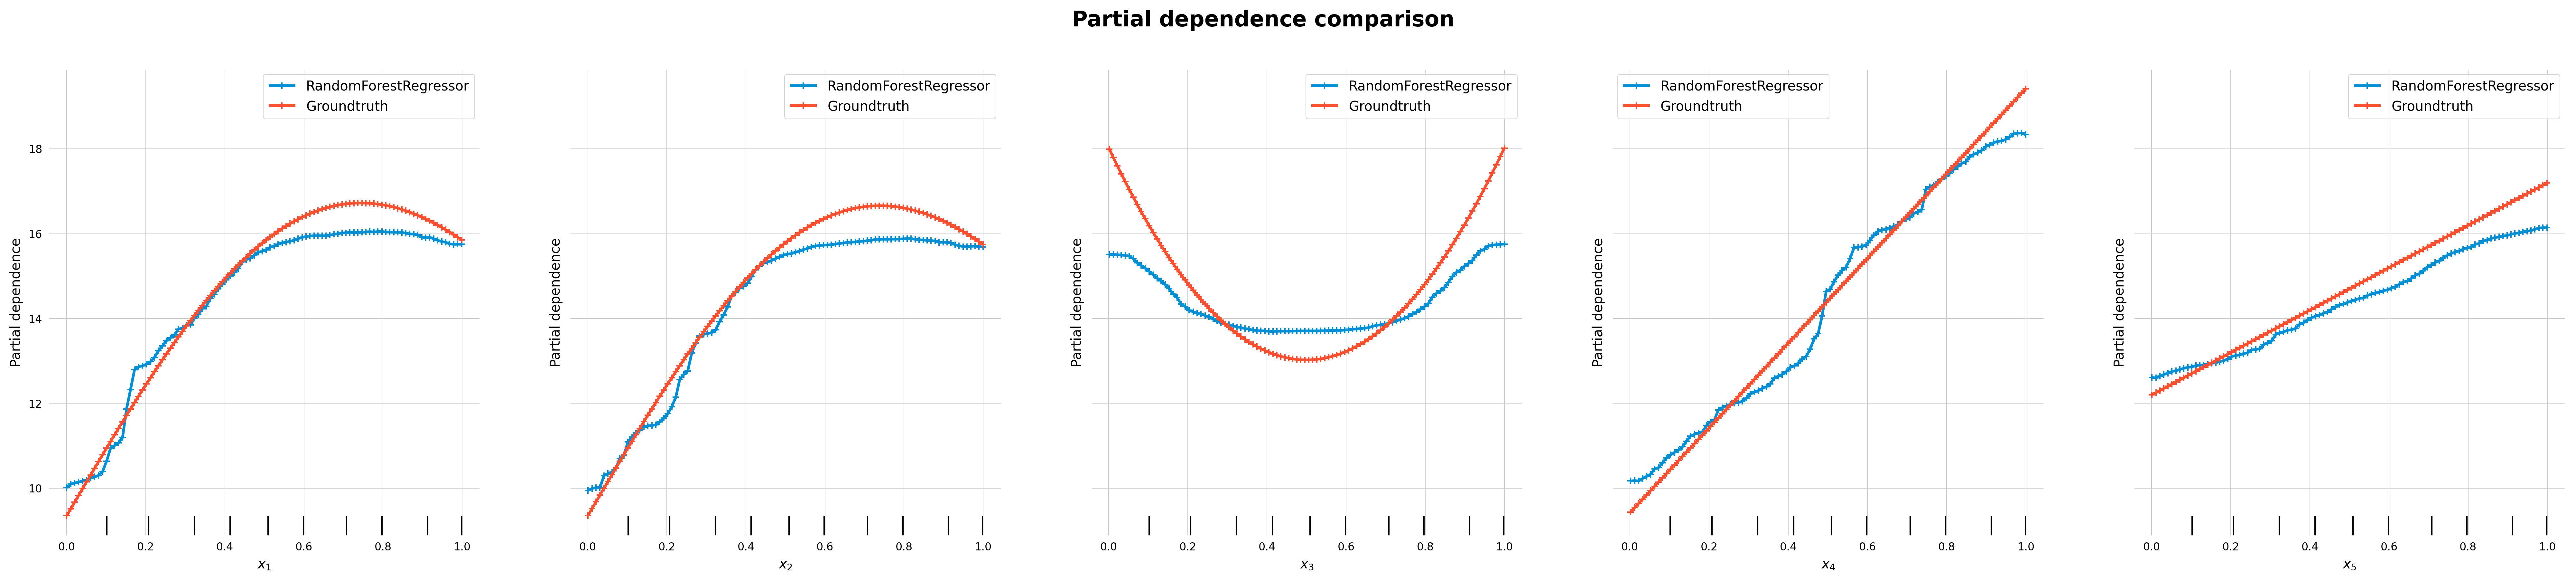

In [9]:
%matplotlib inline
plot_effect_comparison(rf, groundtruth, X_train, effect="PDP", groundtruth_feature_effect="empirical", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

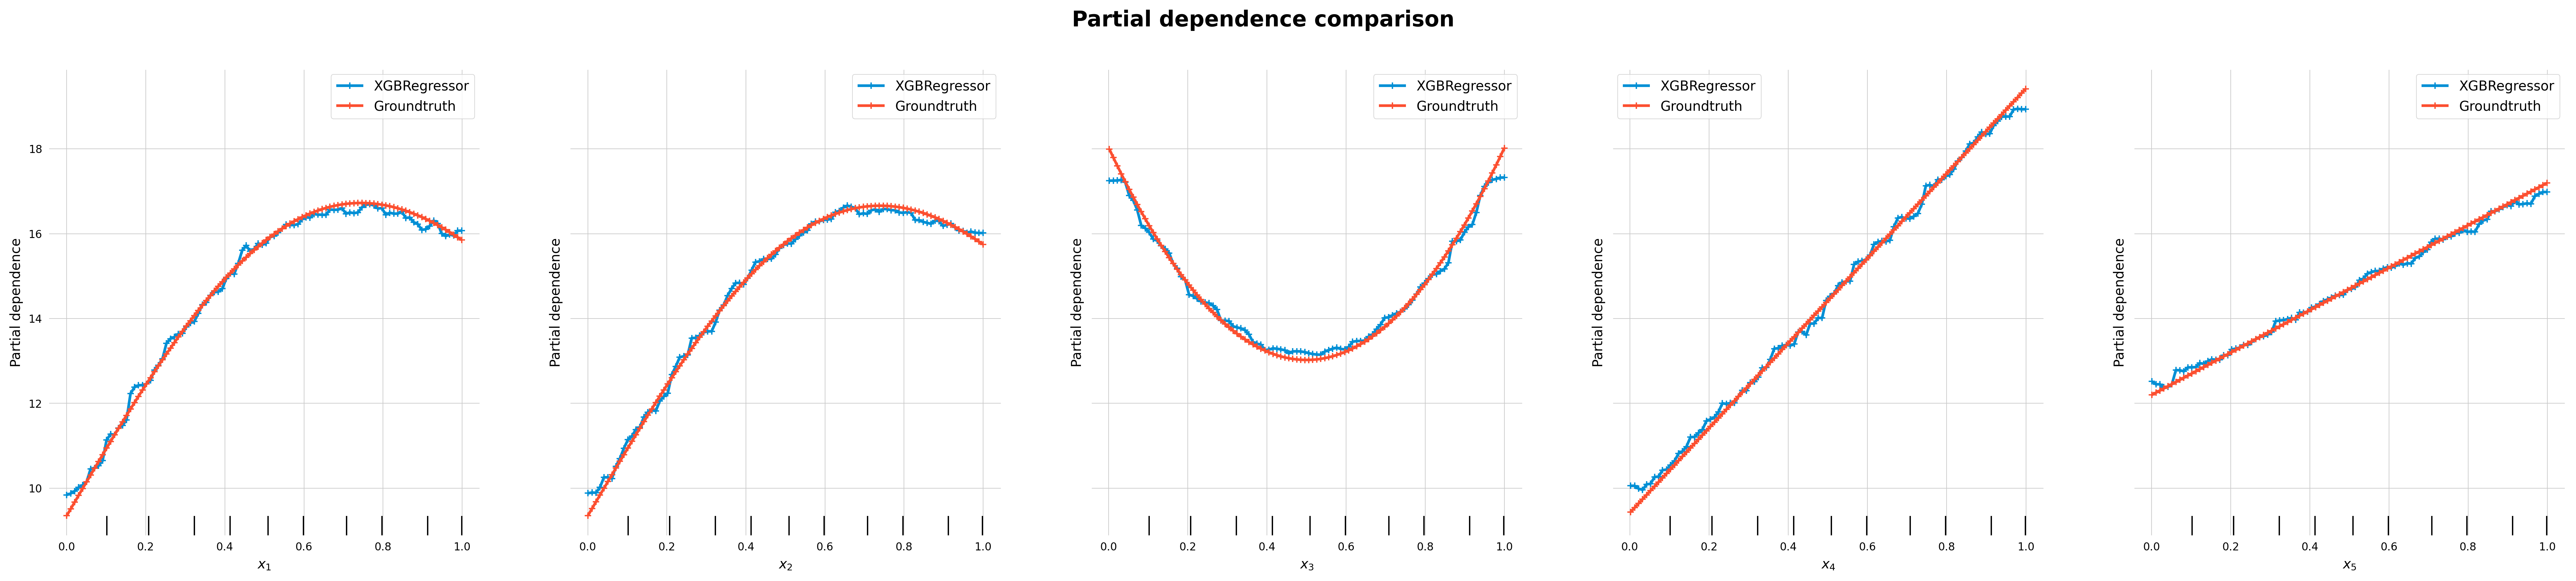

In [10]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="PDP", groundtruth_feature_effect="empirical", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

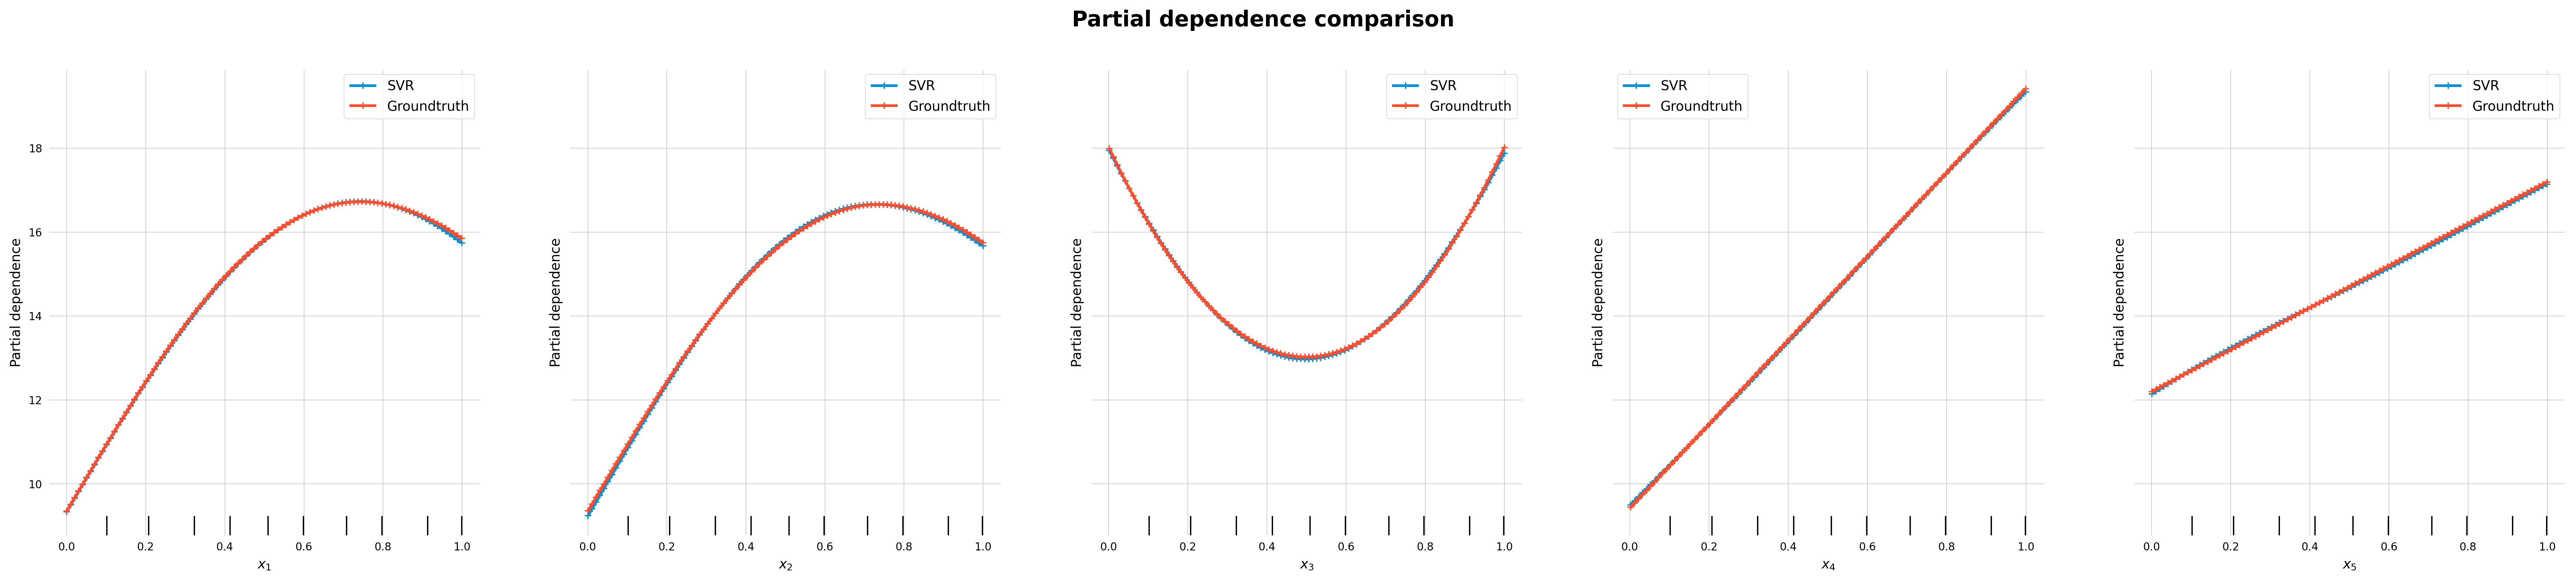

In [11]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="PDP", groundtruth_feature_effect="empirical", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

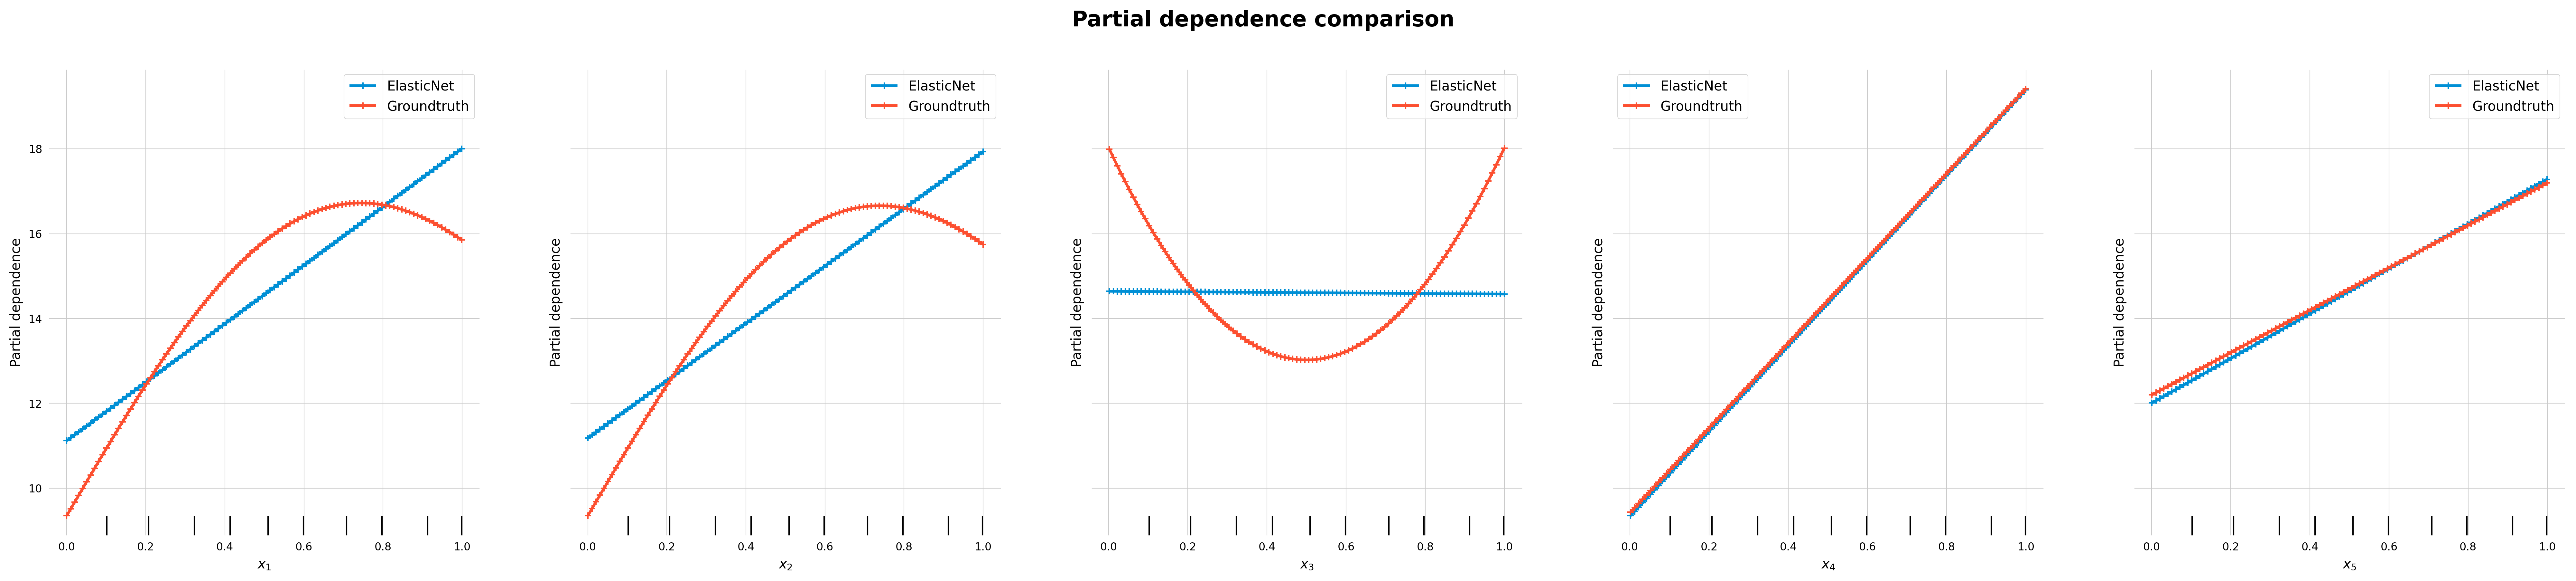

In [12]:
%matplotlib inline
plot_effect_comparison(elasticnet, groundtruth, X_train, effect="PDP", groundtruth_feature_effect="empirical", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

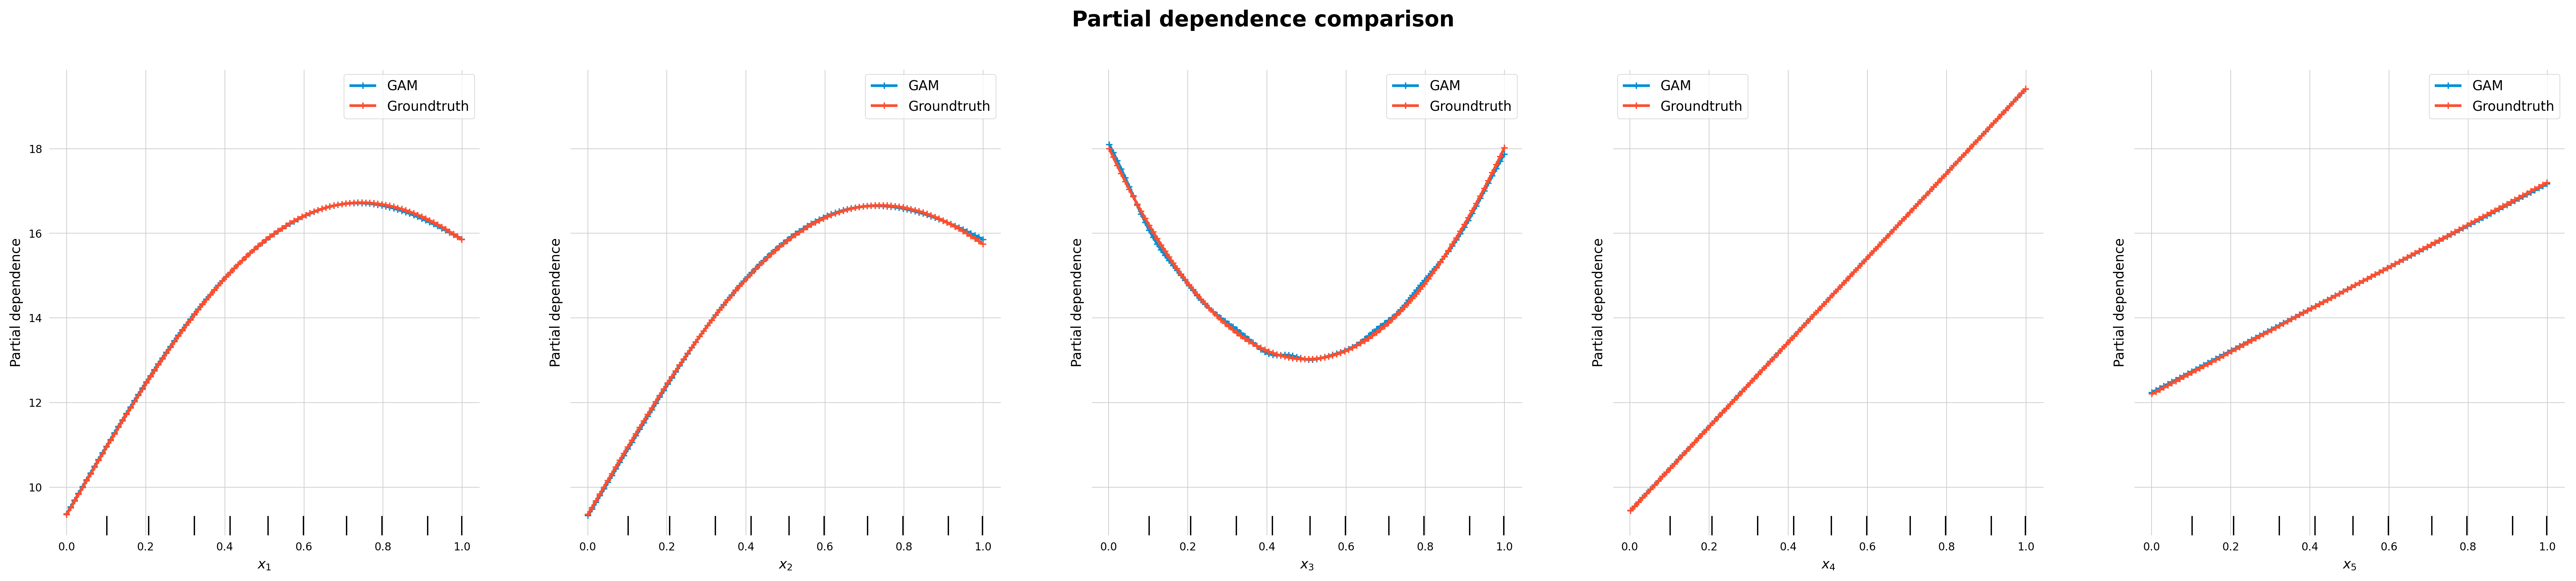

In [13]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="PDP", groundtruth_feature_effect="empirical", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

## ALE

### Error of Model-ALE compared to groundtruth-ALE

In [14]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///..{effects_results_storage}")
df

index                                    model_id                  model  \
0        0  RandomForestRegressor_20240612_1_1000_10.0  RandomForestRegressor   
1        0           XGBRegressor_20240612_1_1000_10.0           XGBRegressor   
2        0                    SVR_20240612_1_1000_10.0                    SVR   
3        0             ElasticNet_20240612_1_1000_10.0             ElasticNet   
4        0                    GAM_20240612_1_1000_10.0                    GAM   
..     ...                                         ...                    ...   
245      0  RandomForestRegressor_20240612_25_1000_5.0  RandomForestRegressor   
246      0           XGBRegressor_20240612_25_1000_5.0           XGBRegressor   
247      0                    SVR_20240612_25_1000_5.0                    SVR   
248      0             ElasticNet_20240612_25_1000_5.0             ElasticNet   
249      0                    GAM_20240612_25_1000_5.0                    GAM   

     simulation  n_train   snr              metric       x_1       x_2  \
0             1     1000  10.0  mean_squared_error  0.058169  0.187484   
1             1     1000  10.0  mean_squared_error  0.038246  0.110544   
2             1     1000  10.0  mean_squared_error  0.000752  0.002190   
3             1     1000  10.0  mean_squared_error  1.077304  1.006934   
4             1     1000  10.0  mean_squared_error  0.000408  0.000808   
..          ...      ...   ...                 ...       ...       ...   
245          25     1000   5.0  mean_squared_error  0.208453  0.071176   
246          25     1000   5.0  mean_squared_error  0.117111  0.055482   
247          25     1000   5.0  mean_squared_error  0.003360  0.003685   
248          25     1000   5.0  mean_squared_error  0.940320  0.970808   
249          25     1000   5.0  mean_squared_error  0.001174  0.002426   

          x_3       x_4       x_5  
0    0.524645  0.106930  0.019328  
1    0.034656  0.054126  0.164432  
2    0.001141  0.000246  0.000768  
3    2.293690  0.000351  0.006477  
4    0.003597  0.000013  0.000325  
..        ...       ...       ...  
245  0.491714  0.088561  0.086092  
246  0.091380  0.195727  0.046740  
247  0.006432  0.006248  0.002323  
248  2.345687  0.002355  0.040135  
249  0.022788  0.000328  0.001205  

[250 rows x 12 columns]

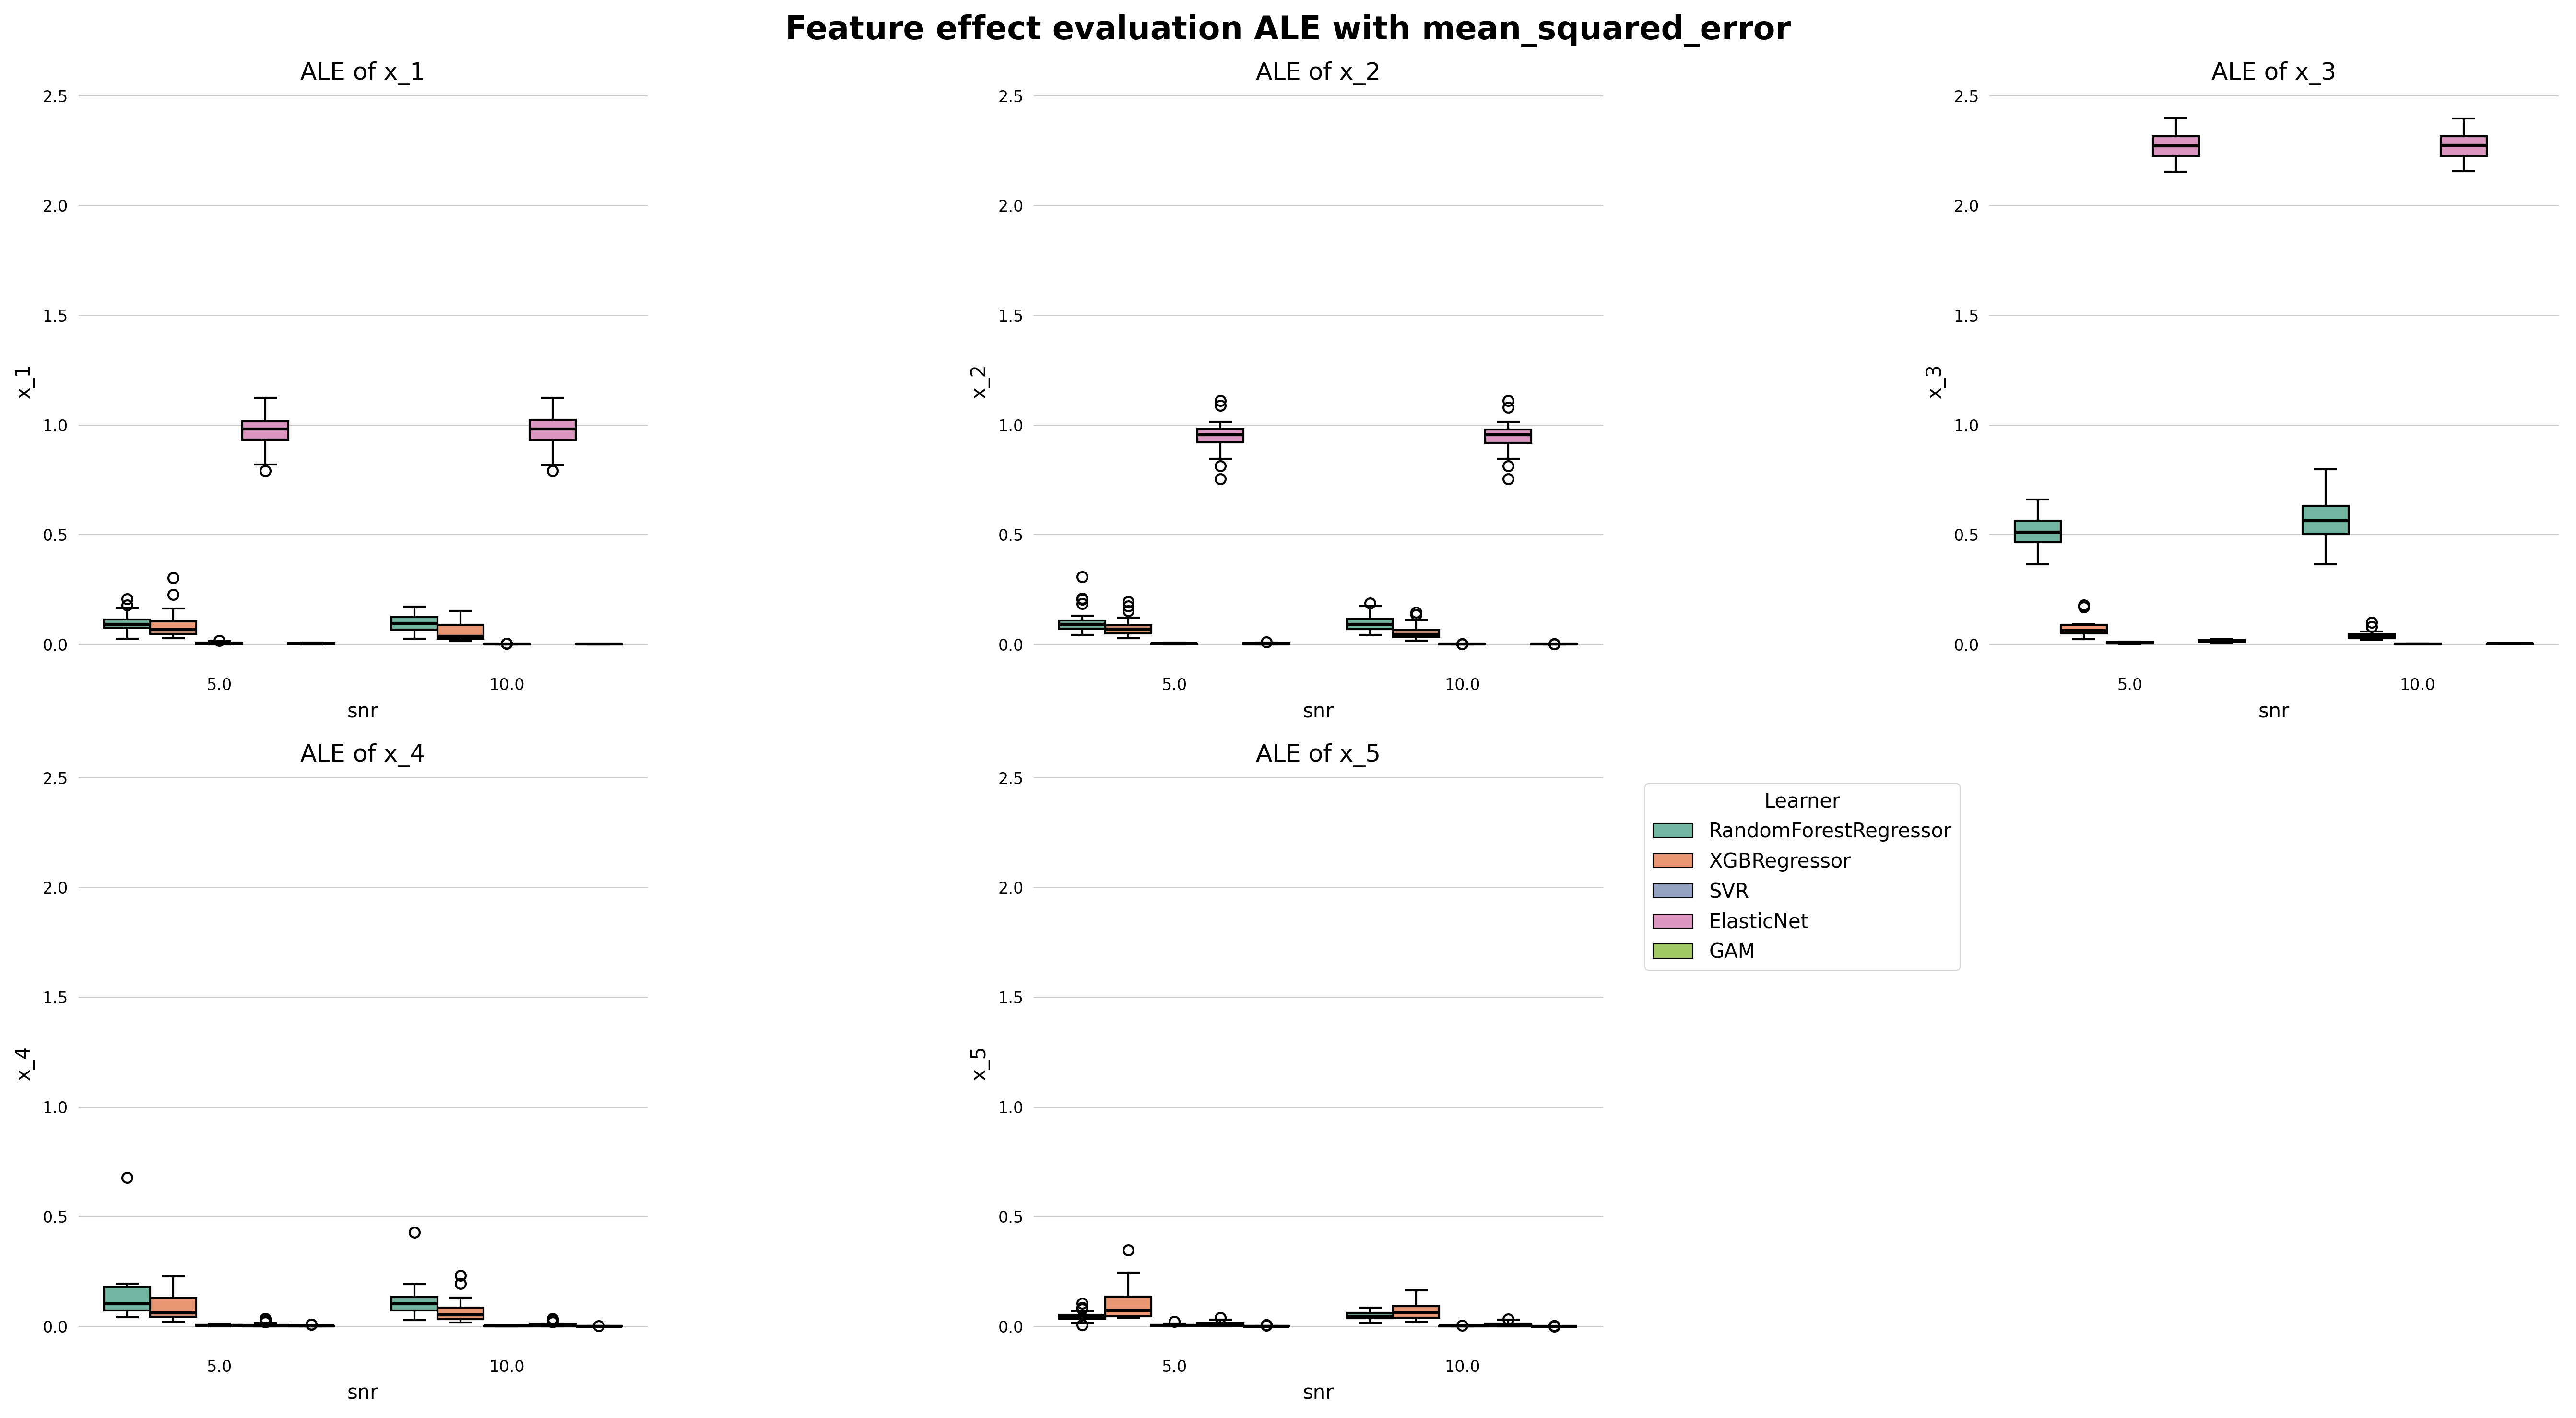

In [15]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="ALE");

### ALE example visualizations

In [16]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={snr})")

(simulation no. 1 with n_train=1000 and noise_sd=10.0)

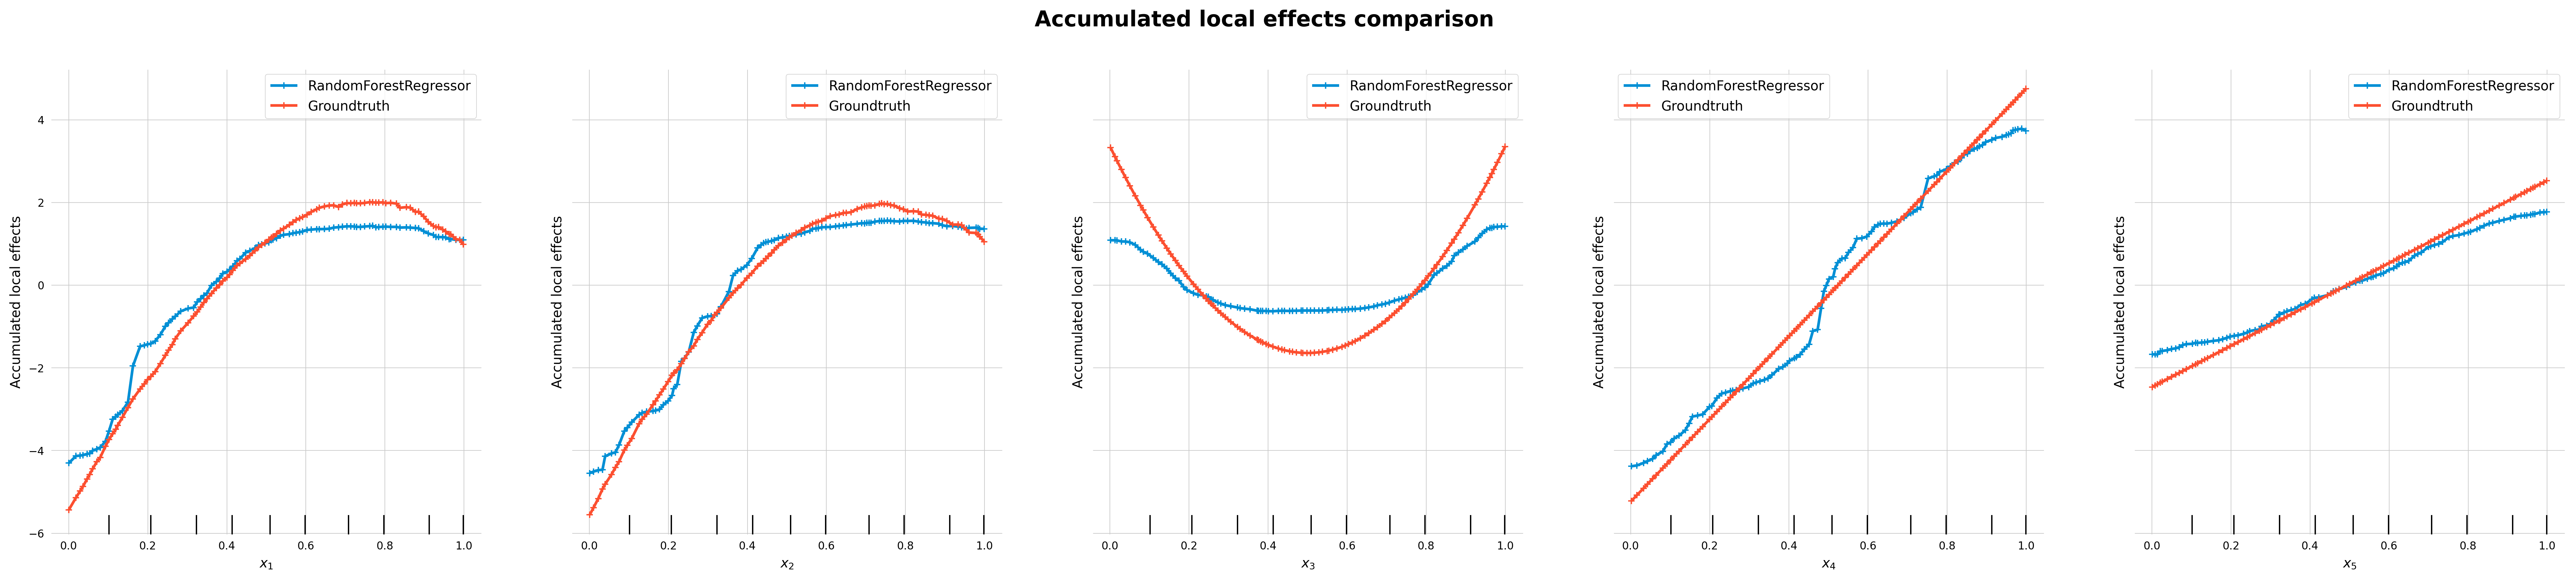

In [17]:
%matplotlib inline
plot_effect_comparison(rf, groundtruth, X_train, effect="ALE", groundtruth_feature_effect="empirical", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

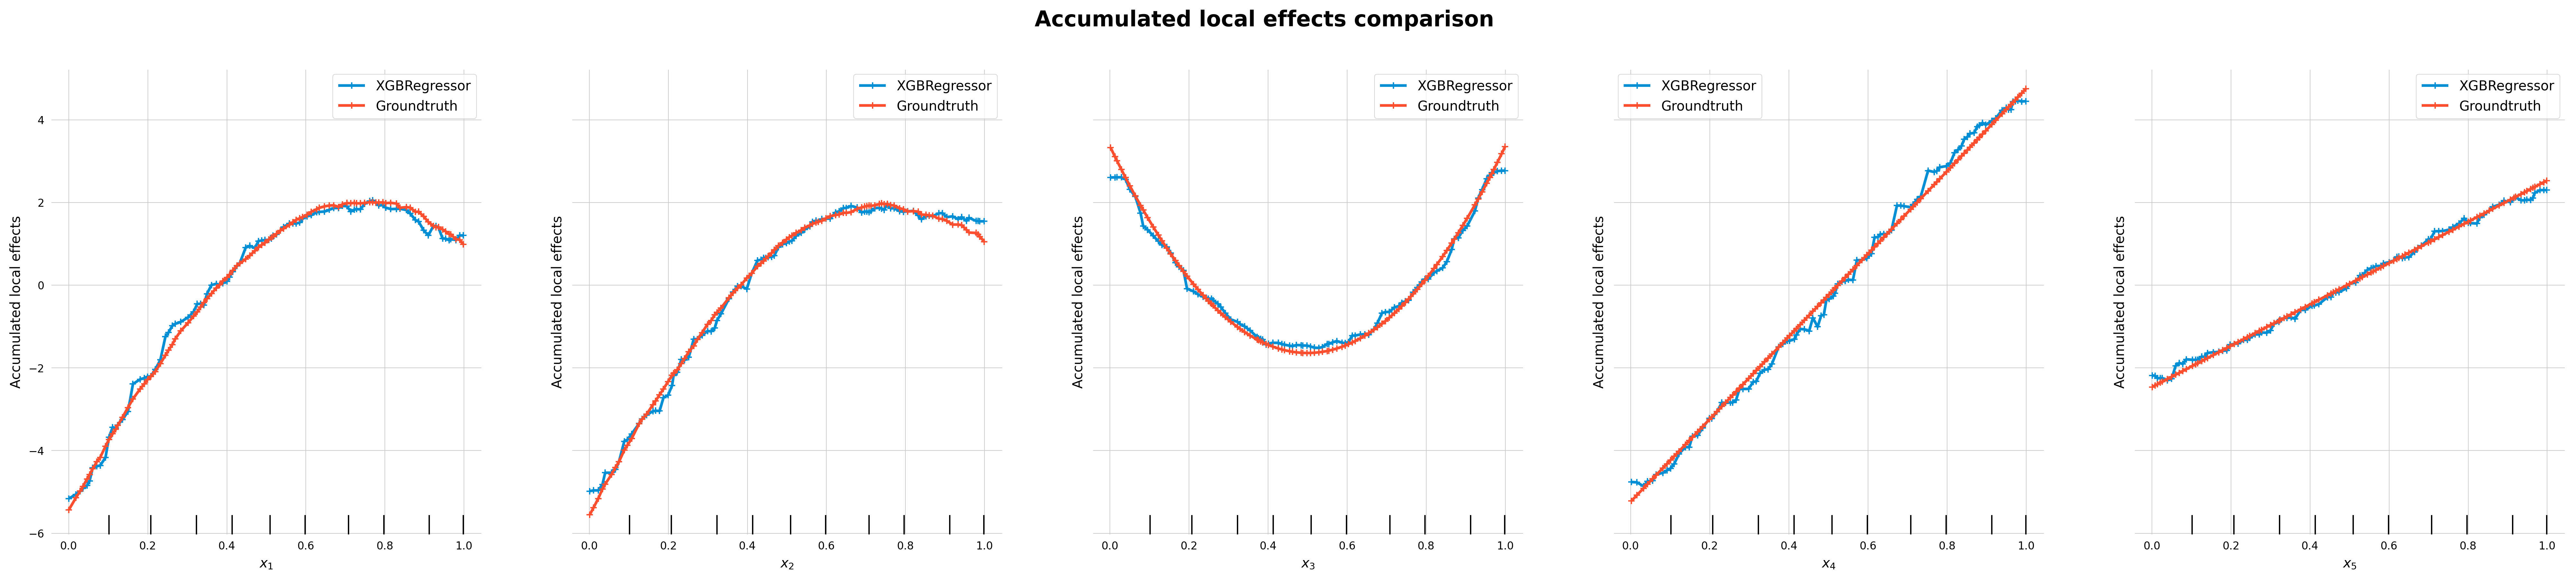

In [18]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="ALE", groundtruth_feature_effect="empirical", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

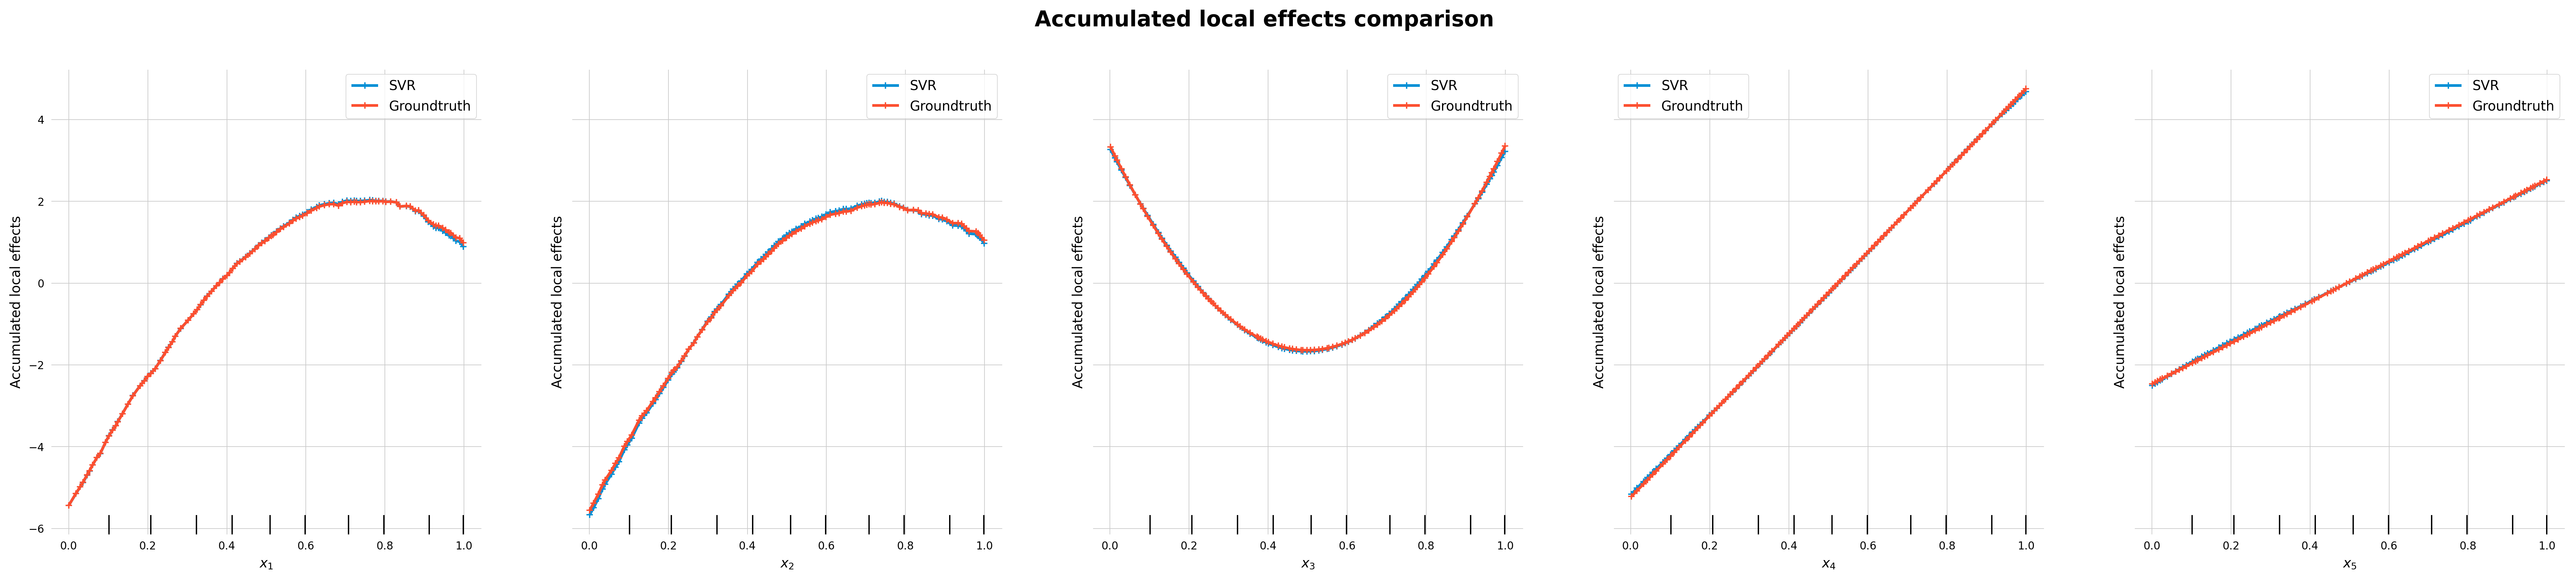

In [19]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="ALE", groundtruth_feature_effect="empirical", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

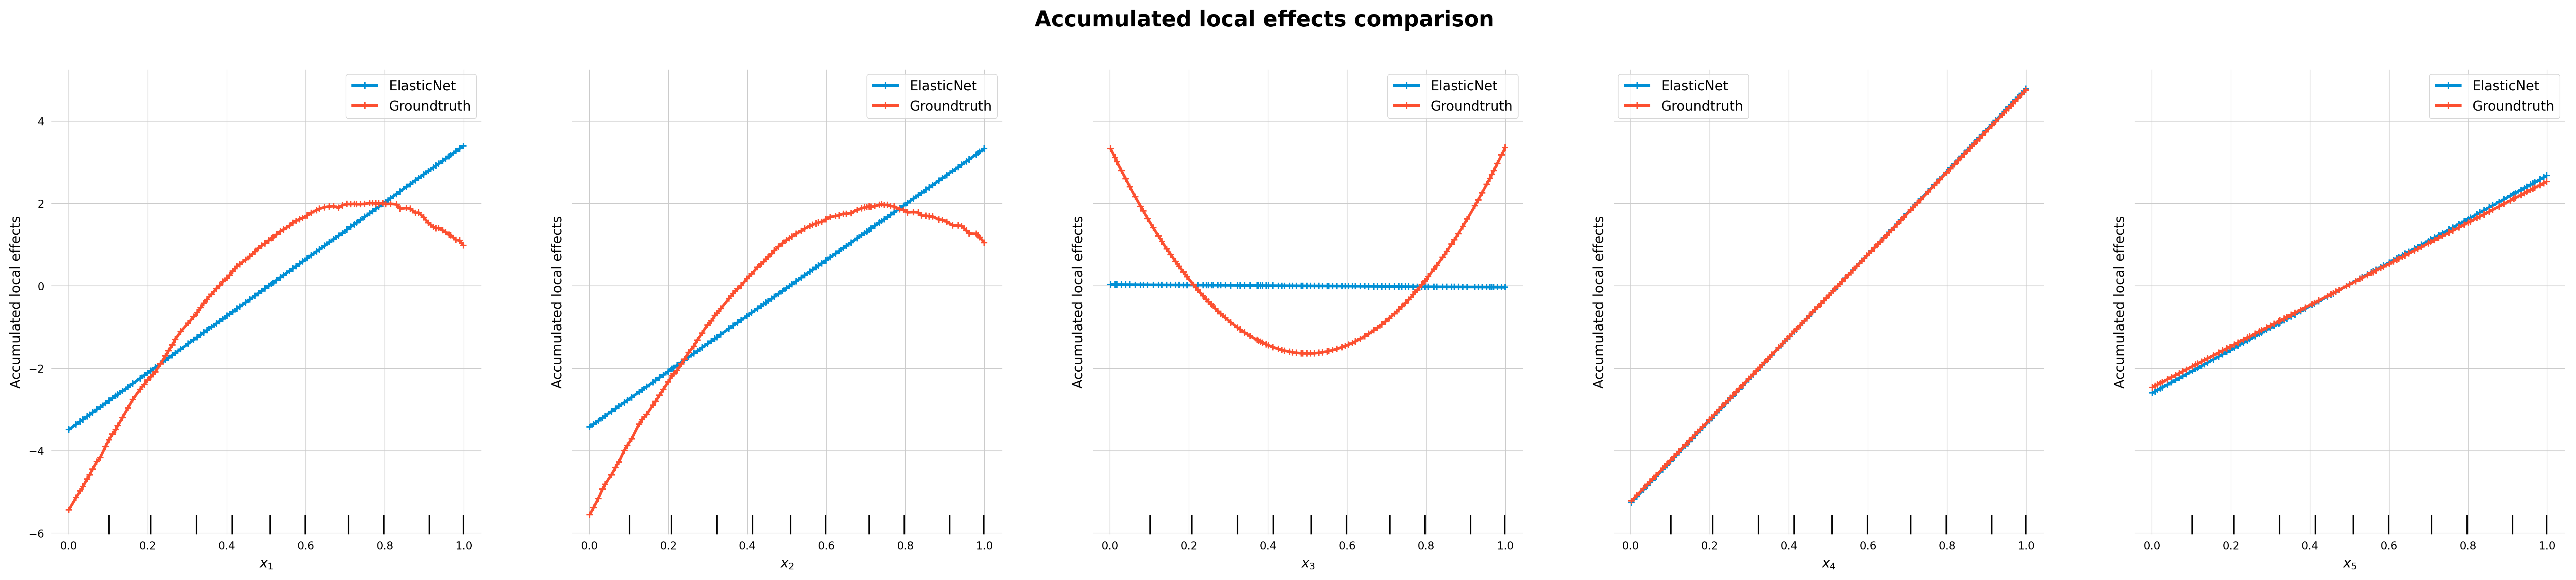

In [20]:
%matplotlib inline
plot_effect_comparison(elasticnet, groundtruth, X_train, effect="ALE", groundtruth_feature_effect="empirical", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

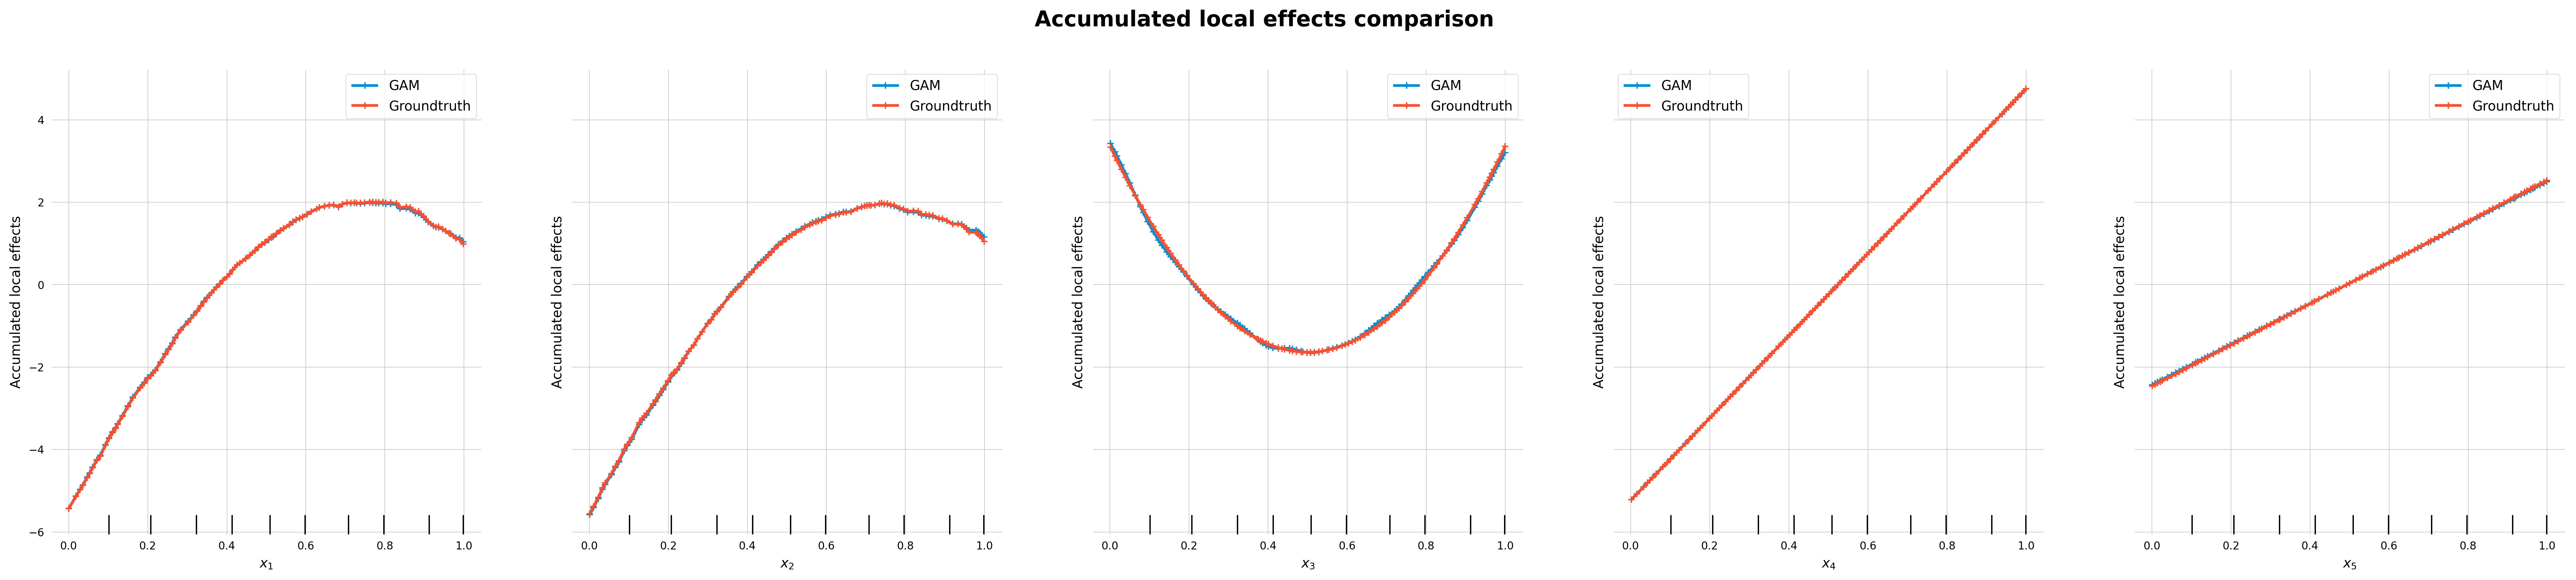

In [21]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="ALE", groundtruth_feature_effect="empirical", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);